<a href="https://colab.research.google.com/github/AndronIxI/cpp/blob/main/labs/%D0%9B%D0%B0%D0%B1%D0%B01_%D0%9C%D0%95%D0%92%D0%94_%D0%A1%D0%BE%D1%80%D0%BE%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [31]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [64]:
df = pd.read_csv("/content/monster_com_job_sample.csv")

df.info()

df.sample(7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
69,United States of America,US,NaN,No,jobs.monster.com,Do you have a passion for the beauty industry?...,Salon Coordinator Job in Fargo,Part Time Employee,"Fargo, ND",Other/Not Classified,http://jobview.monster.com/Salon-Coordinator-J...,NaN,Customer Support/Client Care,2f9e2894fbff2bddd6864444b9a81e75
6909,United States of America,US,NaN,No,jobs.monster.com,Job Details: Civil EngineerCivil Engineering F...,Civil Engineer (Land Development/Site Design/M...,"Full Time, Employee","Wayne , PA",NaN,http://jobview.monster.com/civil-engineer-land...,NaN,Experienced (Non-Manager),eeb54778d556babee82fb15c9fbec764
18364,United States of America,US,NaN,No,jobs.monster.com,Auto Parts Delivery Drivers / Couriers Partsf...,Driver Job in Jacksonville,Temporary/Contract/Project,Auto Parts Delivery Drivers / Couriers Partsf...,All,http://jobview.monster.com/driver-job-jacksonv...,NaN,Logistics/Transportation,2a476d4b2fab02dc6c81723d3c72ba78
1849,United States of America,US,NaN,No,jobs.monster.com,Randstad at Cobb is currently hiring an Office...,Office Administrator Job in Smyrna,Full Time Employee,"Smyrna, GA 30080",Real Estate/Property ManagementBusiness Servic...,http://jobview.monster.com/office-administrato...,"45,000.00 - 45,000.00 $ /year",NaN,43e2f7a62b93867354d60fc7abb147c0
18360,United States of America,US,NaN,No,jobs.monster.com,Company Description: Crown Equipment Corpora...,Spring Marketing Product Management Co-Op () ...,"Full Time, Employee","New Bremen, OH",Engineering Services,http://jobview.monster.com/spring-2017-marketi...,NaN,Marketing/Product,855ca33c36027a1bf879ba63d101152f
13535,United States of America,US,NaN,No,jobs.monster.com,Large medical device manufacturer is seeking a...,Project Manager - Medical Device/Product Devel...,Full Time Temporary/Contract/Project,"Round Lake, IL 60073",NaN,http://jobview.monster.com/Project-Manager-Med...,60.00 - 75.00 $ /hour,NaN,e054498eb01304534a5b9070608c28dc
5827,United States of America,US,NaN,No,jobs.monster.com,Beacon Hill Legal is looking for a Legal Assis...,Real Estate Legal Assistant Job in Chicago,Full Time Employee,ChicagoIL,Legal Services,http://jobview.monster.com/Real-Estate-Legal-A...,NaN,Legal,7ed5011de0abc62a5c9c9d11c92663a7


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` | ```object``` | ```столбца country_code хватило бы``` |
```country_code``` | ```object``` | ``` ``` |
```date_added``` | ```object``` | ```Почти полностью пустой столбец``` |
```has_expired``` | ```object``` | ```str вместо bool``` |
```job_board``` | ```object``` | ``` ``` |
```job_description``` | ```object``` | ```Присутствуют ошибки по типу Job Description Job #:  707063**If interested ...``` |
```job_title``` | ```object``` | ```Присутствуют данные из других столбцов``` |
```job_type``` | ```object``` | ```(формат данных может отличаться Full Time Employee и Full Time)``` |
```location``` | ```object``` | ```Всё в кучу + Присутствуют ошибки по типу Job Description Job #:  707063**If interested ...``` |
```organization``` | ```object``` | ```Присутствуют данные из других столбцов``` |
```page_url``` | ```object``` | ```page_url``` |
```salary``` | ```object``` | ```Нет единого формата, отличаются ед измерения``` |
```sector``` | ```object``` | ```Присутствуют данные из других столбцов``` |
```uniq_id``` | ```object``` | ``` ``` |

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


1)



,Всего ячеек,Пустых ячеек
country,22000,0
country_code,22000,0
date_added,22000,21878
has_expired,22000,0
job_board,22000,0
job_description,22000,0
job_title,22000,0
job_type,22000,1628
location,22000,0
organization,22000,6867




2)  0


3)


<Axes: >

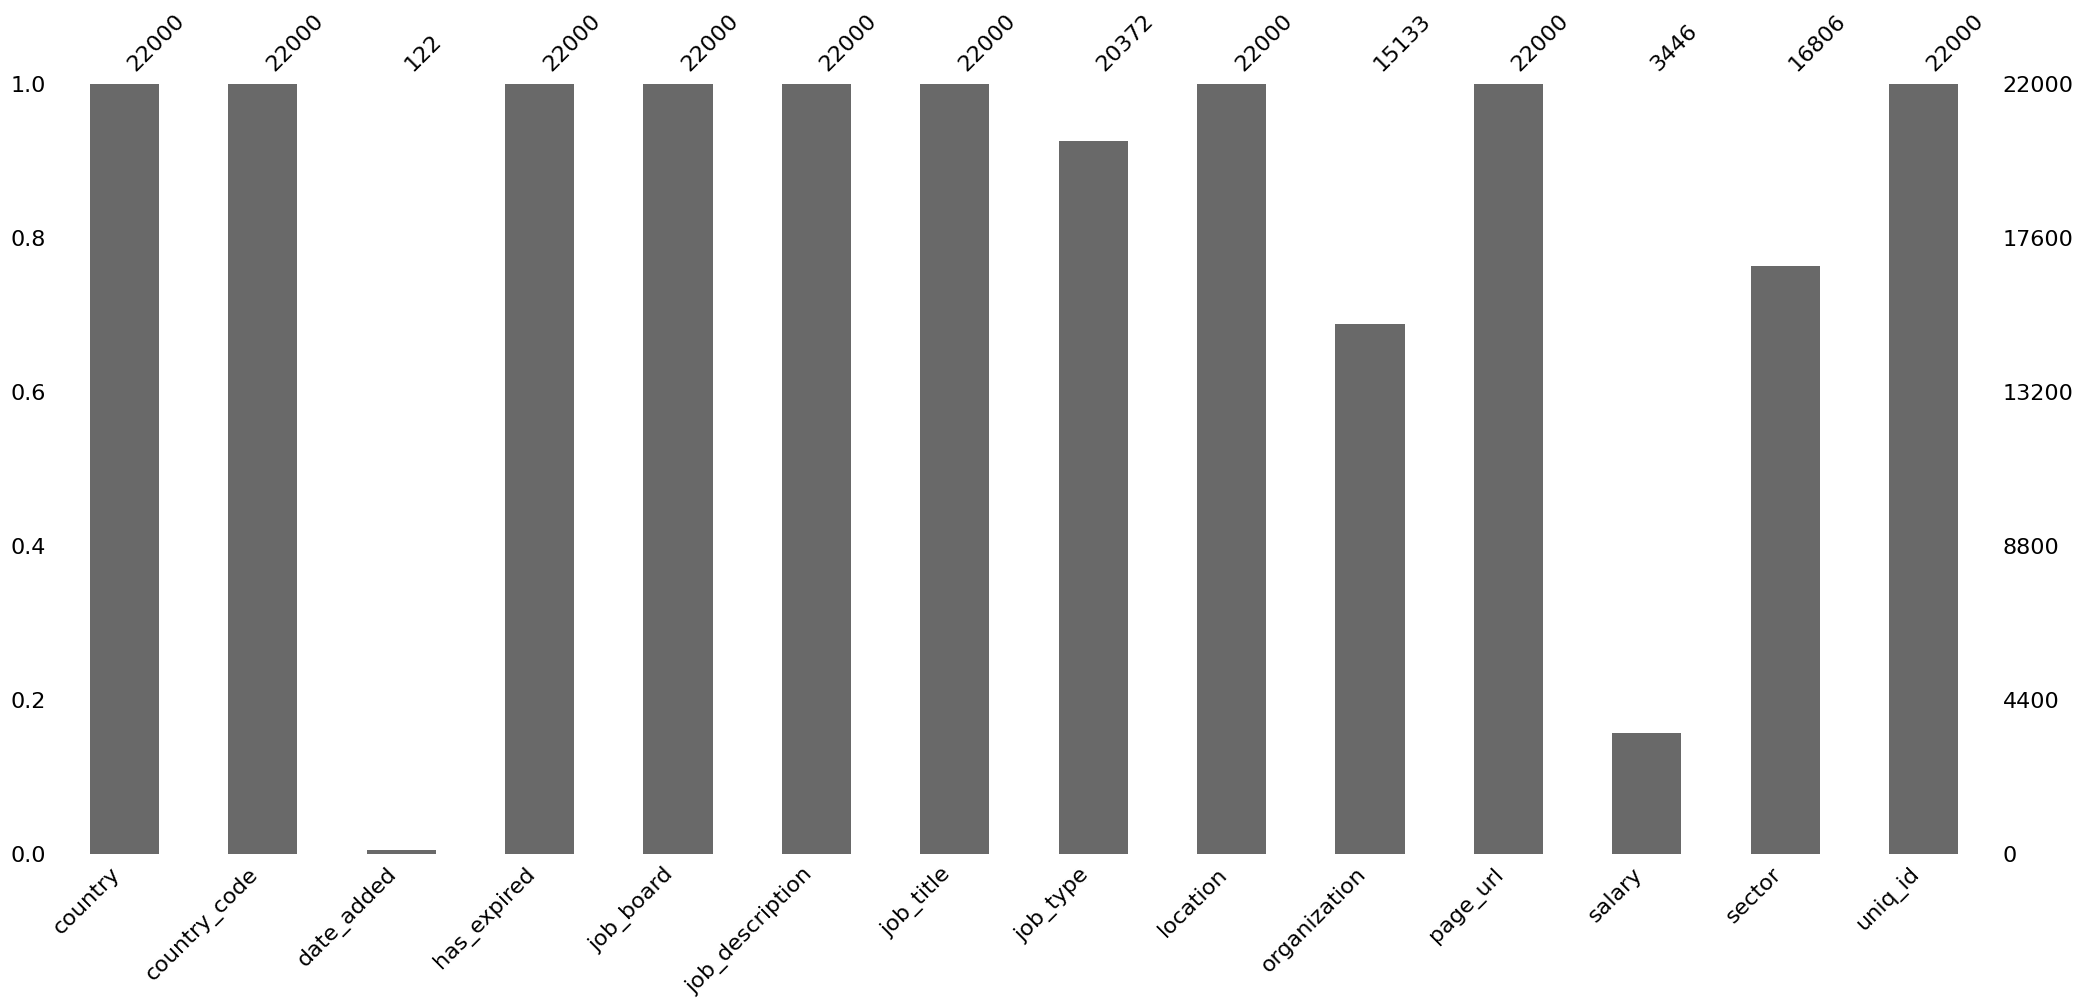

In [33]:
# Пункт 1
missing_data = pd.DataFrame({
  'Всего ячеек': df.shape[0],
  'Пустых ячеек': df.isnull().sum()
})
print("1)\n")
display(missing_data)



# Пункт 2
persent = 0.75 * df.shape[1]
misses_in_line = df.isnull().sum(axis=1) > persent
print("\n\n2) ", misses_in_line.sum())


# Пункт 3
print("\n\n3)")
msno.bar(df)

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
df_clean = df.dropna()
print("До: ", df.shape[0], " строк", "\nПосле: ", df_clean.shape[0], "строк")

До:  22000  строк 
После:  5 строк


### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [36]:
print("1)\n")
display(df.nunique())

unique_values = {col: set(df[col].dropna().unique()) for col in df.columns}
columns = list(df.columns)
repeats = set()
for i in range(len(columns) - 1):
  for j in range(i + 1, len(columns)):
    col1 = columns[i]
    col2 = columns[j]
    both = unique_values[col1] & unique_values[col2]
    repeats.update(both)

print("\n\n2) Повторяющиеся значения: тут слишком много значений")
#for i in repeats:
#  print(i)

print("\n3)\n")
for col in df.columns:
  print("\n", col)
  display(df[col].dropna().sample(10))

1)



,0
country,1
country_code,1
date_added,78
has_expired,1
job_board,1
job_description,18744
job_title,18759
job_type,39
location,8423
organization,738




2) Повторяющиеся значения: тут слишком много значаний

3)


 country


,country
1359,United States of America
8891,United States of America
16229,United States of America
11697,United States of America
4128,United States of America
16935,United States of America
11019,United States of America
7061,United States of America
4505,United States of America
9156,United States of America



 country_code


,country_code
7136,US
20671,US
4382,US
4733,US
14940,US
20129,US
7706,US
13139,US
18178,US
16961,US



 date_added


,date_added
1853,12/20/2016
20066,6/3/2016
21342,3/30/2016
4720,9/22/2016
18343,9/9/2016
1283,6/23/2016
15246,10/27/2016
19786,3/21/2016
15731,7/5/2016
17048,8/5/2016



 has_expired


,has_expired
19838,No
21914,No
16954,No
14441,No
20153,No
6994,No
21568,No
4603,No
13048,No
21880,No



 job_board


,job_board
13013,jobs.monster.com
5423,jobs.monster.com
5912,jobs.monster.com
20932,jobs.monster.com
15659,jobs.monster.com
16440,jobs.monster.com
10871,jobs.monster.com
16431,jobs.monster.com
8334,jobs.monster.com
4354,jobs.monster.com



 job_description


,job_description
3762,Dreaming of a health care career? As a Nationa...
5170,COMPANY SUMMARY: Headquartered in Broadview H...
8260,ESSENTIAL JOB FUNCTIONS * Excellent communicat...
17994,The Retention Marketing Team is seeking a Seni...
3125,Full-TimeBrookdale Riverwalk SNF 350 Calloway ...
10244,We are looking for Competitive Individuals to ...
20005,"Histology lab opening in Bourbonnais, Illinois..."
18900,Position Summary To exceed customer needs and ...
17199,Our client is currently seeking a Sharepoint D...
7070,"• Utilizes knowledge building, knowledge shari..."



 job_title


,job_title
13263,Project Manager Job in Warren
9996,Warehouse Coordinator Job in Franklin
12376,Custodian Job in Cincinnati
6533,B Combat Engineer - Construction and Engineeri...
14344,Freight Operations Supervisor Job in Atlanta
13585,Data Analyst Job in Charlottesville
8533,Customer Service Representative - Job in Denver
3319,Occupational Health Nurse (part time - primari...
12261,quality assurance manager Job in Chicago
14324,BRAND NEW OFFICE HIRING FOR ENTRY LEVEL POSITI...



 job_type


,job_type
2435,Full Time Employee
14371,Full Time Employee
1862,Full Time Employee
5696,Full Time
814,"Full Time, Employee"
19741,Full Time
13113,Full Time
6628,Full Time Employee
15846,"Full Time, Employee"
12326,"Full Time, Employee"



 location


,location
2118,"Houston, TX"
9731,"Cheektowaga, NY 14225"
1767,"Atlanta, GA"
9750,"Long Branch, NJ 07740"
15549,46516
18061,"Dallas, TX 75235"
3749,"San Antonio, TX"
1539,"Onalaska, WI 54650"
17907,"Irving, TX 75062"
2990,"Clearwater, FL 33760"



 organization


,organization
17137,Manufacturing - Other
18508,Healthcare Services
10816,Healthcare Services Business Services - Other
9802,All
10079,"Pasadena, TX 77501"
15978,Retail
9106,Manufacturing - Other
4391,Biotechnology/Pharmaceuticals
9212,Manufacturing - Other
17449,AllAdvertising and PR ServicesBusiness Service...



 page_url


,page_url
4254,http://jobview.monster.com/accounts-receivable...
19955,http://jobview.monster.com/Delivery-Driver-Job...
13211,http://jobview.monster.com/Quality-Manager-Job...
1888,http://jobview.monster.com/field-service-techn...
2666,http://jobview.monster.com/Registered-Nurse-RN...
17698,http://jobview.monster.com/2815-QA-Consultant-...
8980,http://jobview.monster.com/NOC-Administrator-E...
3969,http://jobview.monster.com/accounting-director...
21725,http://jobview.monster.com/IT-Financial-Analys...
4510,http://jobview.monster.com/project-manager-i-j...



 salary


,salary
11964,13.75 - 13.75 $ /hour
100,"31,000.00 - 33,000.00 $ /year"
9826,16.57 - 16.57 $ /hour
4738,25.00 - 31.00 $ /hour
10014,14.00 - 18.00 $ /hour
61,"45,000.00 - 100,000.00 $ /yearBonus, Benefits,..."
8986,10.00 - 20.00 $ /hourBased on experience
14248,"30,000.00 - 35,000.00 $ /year"
7776,"45,000.00 - 55,000.00 $ /year"
7014,"100,000.00 - 135,000.00 $ /year"



 sector


,sector
16648,Experienced (Non-Manager)
17434,Manager (Manager/Supervisor of Staff)
18520,Entry Level
9062,Experienced (Non-Manager)
13637,Experienced (Non-Manager)
4173,Entry Level
19759,Medical/Health
525,Experienced (Non-Manager)
18398,Logistics/Transportation
6205,Entry Level



 uniq_id


,uniq_id
1114,d4d28bc3aff5ef77d527db9598cbaf80
5798,18857bbae237dc7bc508af56c3aa87ac
19441,a4aecc37c46b72b114dd860966a0c676
12931,410afb97ffc757e75da7fd4f309bb580
14990,3856f7e31e79c343a68ee292c5823601
9845,3418ca47c1861315cc175bbf4dd9e316
15855,729671d4f78dd0802bc727162729ac76
4923,b8cbbfce9cebe45e9fe90d893c980e2f
7925,5329dcbafcc761cf63187d84c8f4cb53
18946,2b41704c56f9410bf354b029a99cfaba


### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [ ]:
print("1 и 2)")
for i in df.columns:
  if df.nunique()[i] == 22000:
    print(i)

find_dupl = df.drop(columns = ['page_url', 'uniq_id'])
duplicat = find_dupl[find_dupl.duplicated()].drop_duplicates()
print("\n3)", duplicat.shape[0], "строк дублируются больше 1 раза")

1 и 2)
page_url
uniq_id

3) 910 строк дублируются больше 1 раза


# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

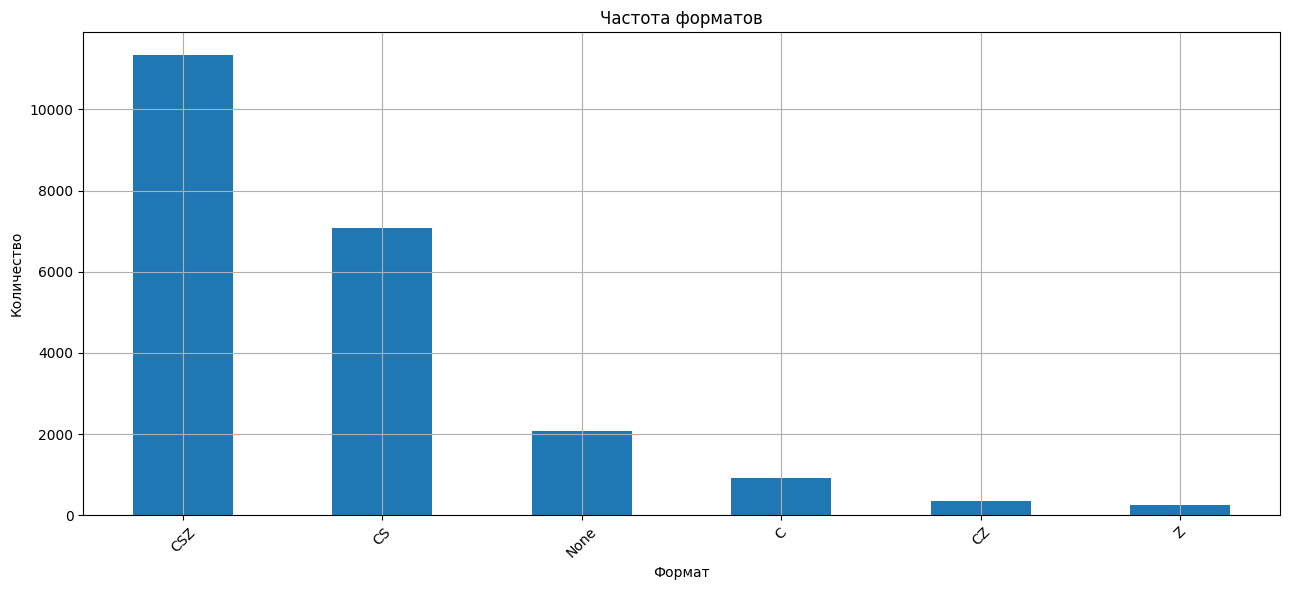

In [16]:
import re

patterns = {
  'CSZ': r'^[a-zA-Z\s]+[, ]+[A-Z]{2}[, ]+\d{5}$',
  'CS': r'^[a-zA-Z\s]+[, ]+[A-Z]{2}$',
  'CZ': r'^[a-zA-Z\s]+[, ]*\d{5}$',
  'SZ': r'^[A-Z]{2}[, ]+\d{5}$',
  'C': r'^[a-zA-Z\s]+$',
  'S': r'^[A-Z]{2}$',
  'Z': r'^\d{5}$'
}

def detect_format(location):
  if pd.isna(location):
    return 'None'
  for name, pattern in patterns.items():
    if re.match(pattern, location.strip()):
      return name
  return 'None'


formats = pd.DataFrame()
formats['format'] = df['location'].apply(detect_format)
format_counts = formats['format'].value_counts()

format_counts.plot(kind='bar', figsize=(13, 6), title='Частота форматов')
plt.xlabel('Формат')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [37]:
patterns = {
  'CSZ': r'^[a-zA-Z\s]+[, ]+[A-Z]{2}[, ]+\d{5}$',
  'CS': r'^[a-zA-Z\s]+[, ]+[A-Z]{2}$',
  'CZ': r'^[a-zA-Z\s]+[, ]*\d{5}$',
  'SZ': r'^[A-Z]{2}[, ]+\d{5}$',
  'C': r'^[a-zA-Z\s]+$',
  'S': r'^[A-Z]{2}$',
  'Z': r'^\d{5}$'
}

Unknowns = df[['location']].dropna()

for loc in Unknowns['location']:
  for name, pattern in patterns.items():
    if re.match(pattern, loc.strip()):
      Unknowns = Unknowns[Unknowns['location'] != loc]
display(Unknowns)


sorted_loc = df.dropna(subset=['location'])
for loc in Unknowns['location']:
  sorted_loc = sorted_loc[sorted_loc['location'] != loc]
sorted_loc['location'] = sorted_loc['location'].str.strip()

sorted_loc[['City', 'State', 'ZIP']] = sorted_loc['location'].str.extract(r'^(?:([a-zA-Z\s]+?)\s*[, ]*)?(?:([A-Z]{2})\s*[, ]*)?(?:(\d{5}))?$')
sorted_loc['City'] = sorted_loc['City'].str.strip()
sorted_loc['State'] = sorted_loc['State'].str.strip()
sorted_loc['ZIP'] = sorted_loc['ZIP'].str.strip()
sorted_loc['ZIP'] = pd.to_numeric(sorted_loc['ZIP'], errors='coerce').astype('Int64')

sorted_loc.drop('location', axis=1, inplace=True)
display(sorted_loc)

,location
2,DePuy Synthes Companies is a member of Johnson...
29,"Sr. Process Engineer, Manufacturing"
36,"RF System Technician, Field Service"
38,Bi-Lingual Editorial Strategist
44,"Bradford, Vt 05033"
...,...
21933,Location:
21944,Maintenance Planner-16150DescriptionLocation: ...
21963,Job Title:Consultant Security NetworkJob Descr...
21967,Location:


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,organization,page_url,salary,sector,uniq_id,City,State,ZIP
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,Madison,WI,53702
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,Madison,WI,53708
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,Dixon,CA,<NA>
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,Camphill,PA,<NA>
5,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66,Charlottesville,VA,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,Cincinnati,OH,<NA>
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,Cincinnati,OH,45236
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,Chicago,IL,60602
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,Chicago,IL,60609


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [38]:
City_patt = r'([a-zA-Z\s]{3,})'
State_patt = r'\b([a-zA-Z]{2})\b'
ZIP_patt = r'(\d{5})'

Unknowns['location'] = Unknowns['location'].str.strip()

Unknowns['City'] = Unknowns['location'].str.extract(City_patt)[0].str.strip()
Unknowns['State'] = Unknowns['location'].str.extract(State_patt)[0]
Unknowns['ZIP'] = Unknowns['location'].str.extract(ZIP_patt)[0]
Unknowns['ZIP'] = pd.to_numeric(Unknowns['ZIP'], errors='coerce').astype('Int64')
display(Unknowns)

,location,City,State,ZIP
2,DePuy Synthes Companies is a member of Johnson...,DePuy Synthes Companies is a member of Johnson,is,<NA>
29,"Sr. Process Engineer, Manufacturing",Process Engineer,Sr,<NA>
36,"RF System Technician, Field Service",RF System Technician,RF,<NA>
38,Bi-Lingual Editorial Strategist,Lingual Editorial Strategist,Bi,<NA>
44,"Bradford, Vt 05033",Bradford,Vt,5033
...,...,...,...,...
21933,Location:,Location,NaN,<NA>
21944,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner,of,16150
21963,Job Title:Consultant Security NetworkJob Descr...,Job Title,of,<NA>
21967,Location:,Location,NaN,<NA>


### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

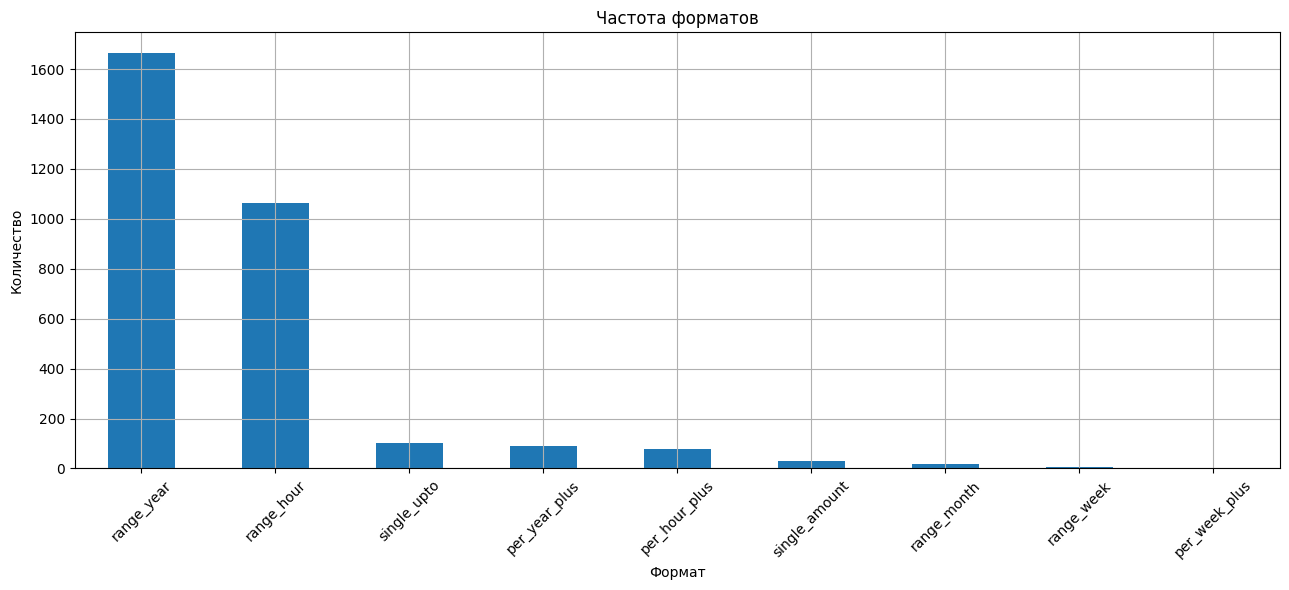

In [17]:
patterns = {
  'per_hour': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*hour',
  'per_week': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*week',
  'per_month': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*month',
  'per_year': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*year',
  'range_hour': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*-\s*\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*hour',
  'range_week': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*-\s*\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*week',
  'range_month': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*-\s*\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*month',
  'range_year': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*-\s*\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*year',
  'per_hour_plus': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*\+\s*/\s*hour',
  'per_week_plus': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*\+\s*/\s*week',
  'per_month_plus': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*\+\s*/\s*month',
  'per_year_plus': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*\+\s*/\s*year',
  'upto_hour': r'^[Uu]p to \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*hour',
  'upto_week': r'^[Uu]p to \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*week',
  'upto_month': r'^[Uu]p to \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*month',
  'upto_year': r'^[Uu]p to \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*/\s*year',
  'single_amount': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?',
  'single_range': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*-\s*\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?',
  'single_upto': r'^[Uu]p to \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?',
  'single_plus': r'^\$?\s*\d+(?:,\d{3})*(?:\.\d+)?\s*\$?\s*\+'
  # \$?\s*\d+(?:,\d{3})*(?:\.\d+)?\$?
}

def detect_salary_format(salary):
  if pd.isna(salary):
      #return 'unknown'
      return
  salary = salary.strip()
  for name, pattern in patterns.items():
    if re.match(pattern, salary):
        return name
  #print(salary)
  #return 'unknown'
  return

formats = pd.DataFrame()
formats['format'] = df['salary'].apply(detect_salary_format)
format_counts = formats['format'].value_counts()

format_counts.plot(kind='bar', figsize=(13, 6), title='Частота форматов')
plt.xlabel('Формат')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

,min_salary,max_salary,period
0,NaN,NaN,None
1,NaN,NaN,None
2,NaN,NaN,None
3,NaN,NaN,None
4,NaN,NaN,None
...,...,...,...
21995,120000.0,160000.0,year
21996,45000.0,60000.0,year
21997,NaN,NaN,None
21998,25.0,28.0,hour


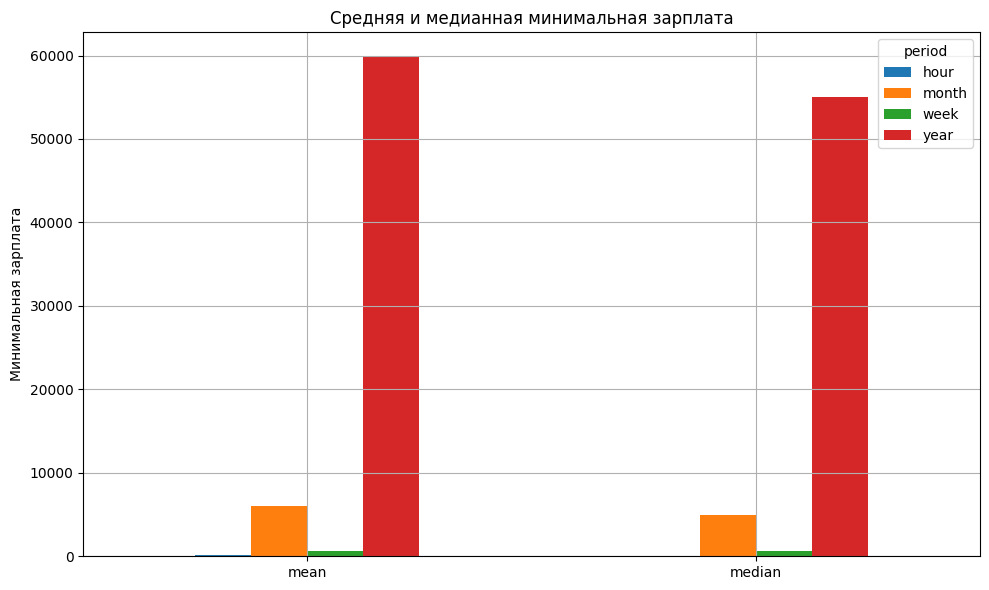

In [83]:
# пункт 1
patterns = {
  'per_hour': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*hour',
  'per_week': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*week',
  'per_month': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*month',
  'per_year': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*year',
  'range_hour': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*-\s*\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*hour',
  'range_week': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*-\s*\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*week',
  'range_month': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*-\s*\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*month',
  'range_year': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*-\s*\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*year',
  'per_hour_plus': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*\+\s*/\s*hour',
  'per_week_plus': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*\+\s*/\s*week',
  'per_month_plus': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*\+\s*/\s*month',
  'per_year_plus': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*\+\s*/\s*year',
  'upto_hour': r'^[Uu]p to \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*hour',
  'upto_week': r'^[Uu]p to \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*week',
  'upto_month': r'^[Uu]p to \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*month',
  'upto_year': r'^[Uu]p to \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*/\s*year',
  'single_amount': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?',
  'single_range': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*-\s*\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?',
  'single_upto': r'^[Uu]p to \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?',
  'single_plus': r'^\$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?\s*\+'
  # \$?\s*(\d+(?:,\d{3})*(?:\.\d+)?)\s*\$?
}



def parse_salary(s):
  if pd.isna(s):
      return pd.Series([None, None, None])
  s = s.strip()
  for name, pattern in patterns.items():
      match = re.search(pattern, s)
      if match:
          nums = match.groups()
          nums = [float(n.replace(',', '')) for n in nums]
          period = None
          if 'hour' in pattern:
              period = 'hour'
          elif 'week' in pattern:
              period = 'week'
          elif 'month' in pattern:
              period = 'month'
          elif 'year' in pattern:
              period = 'year'

          if len(nums) == 2:
              return pd.Series([nums[0], nums[1], period])
          else:
              return pd.Series([nums[0], None, period])

  return pd.Series([None, None, None])

sorted_salary = pd.DataFrame()
sorted_salary[['min_salary', 'max_salary', 'period']] = df['salary'].apply(parse_salary)
display(sorted_salary)


# пункт 2
salary_stats = sorted_salary.groupby('period')['min_salary'].agg(['mean', 'median']).dropna()
salary_stats = salary_stats.T

salary_stats.plot(kind='bar', figsize=(10, 6), title='Средняя и медианная минимальная зарплата')
plt.ylabel('Минимальная зарплата')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

In [ ]:
# PUT YOUR CODE HERE

### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
# PUT YOUR CODE HERE

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
# PUT YOUR CODE HERE

Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

In [ ]:
# PUT YOUR CODE HERE

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.